In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import gmean

In [2]:
df = pd.read_csv('bangladesh_data.csv')
df.head()

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.0,"83,929,765",2.47%,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.0,"86,154,836",2.65%,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.8,"88,555,336",2.79%,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.2,"91,045,478",2.81%,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.8,"93,534,239",2.73%,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 118 entries, Year to Percent
dtypes: float64(26), object(92)
memory usage: 93.2+ KB


In [4]:
df.columns[df.columns.get_loc('GNI (Billion USD)')+1:df.columns.get_loc('Military Size ')]

Index(['Growth Rate (%)', 'GNP (Billion USD)', 'Growth Rate (%).1',
       'Bangladesh Economic Growth GDP (Billion USD)', 'GDP', 'GDP Per Capita',
       'Growth Rate (%).2', 'Export ', 'Export Growth(%GDP)', 'Import ',
       'Import Growth(%GDP)', 'Billions of US $', '% of GDP',
       'Poverty Rate (National)', 'Rural Poverty Rate', 'Urban Poverty Rate',
       'Number of Private Vehichles', 'Death Rate', 'Death Growth Rate',
       'Birth Rate', 'Growth Rate.1', 'Infant Mortality Rate', 'Growth Rate.2',
       'Unemployment Rate (%)', 'Annual Change (%).1',
       'Youth Unemployment Rate', 'Annual Change',
       'Labor Force Participation Rate', 'Annual Change.1',
       'Life Expectancy (years)', 'Life Expectancy Growth Rate (%)',
       'Urban Population', 'Urban Population % of Total',
       'Urban Population Change (%)', 'Rural Population', '% of Total(rural)',
       'Change(rural)', 'Crime Rate (Per 100K Population)',
       'Annual % Crime Rate Change', ' Murder/Homicide

In [5]:
df = df.dropna(subset='Year', axis=0)
df

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.00,"83,929,765",2.47%,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.00,"86,154,836",2.65%,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.80,"88,555,336",2.79%,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.20,"91,045,478",2.81%,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.80,"93,534,239",2.73%,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%
5,1985.0,29.50,"95,959,099",2.59%,"780,000",-1.299,-17.84%,3.34,-1.46,20.47,...,"91,300",12.81,NaN,NaN,NaN,8.39%,0.30%,"9,152,000",10.00%,70.31%
6,1986.0,30.10,"98,271,746",2.41%,"790,000",-1.016,-21.79%,4.17,0.83,23.03,...,NaN,NaN,NaN,NaN,NaN,9.13%,0.74%,"9,161,000",9.00%,70.38%
7,1987.0,30.80,"100,490,256",2.26%,"800,000",-0.734,-27.76%,9.87%,-2.46%,26.55,...,NaN,NaN,NaN,NaN,NaN,10.47%,1.34%,"9,235,000",9.00%,70.95%
8,1988.0,31.40,"102,688,833",2.19%,"810,000",-0.452,-38.42%,7.41%,-2.46%,28.69,...,NaN,NaN,NaN,NaN,NaN,11.19%,0.72%,"9,537,000",9.00%,73.27%
9,1989.0,32.00,"104,893,674",2.15%,"830,000",-0.660,46.02%,6.05%,-1.37%,30.26,...,"103,000.00",12.81%,NaN,NaN,NaN,11.06%,-0.13%,"9,553,000",9.00%,73.39%


In [6]:
def convert_to_float(col):
    df[col] = df[col].str.strip('%').astype(float)
    return df[col]

In [7]:
df['Population growth rate (%)'] = convert_to_float('Population growth rate (%)')
df

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.00,"83,929,765",2.47,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.00,"86,154,836",2.65,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.80,"88,555,336",2.79,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.20,"91,045,478",2.81,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.80,"93,534,239",2.73,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%
5,1985.0,29.50,"95,959,099",2.59,"780,000",-1.299,-17.84%,3.34,-1.46,20.47,...,"91,300",12.81,NaN,NaN,NaN,8.39%,0.30%,"9,152,000",10.00%,70.31%
6,1986.0,30.10,"98,271,746",2.41,"790,000",-1.016,-21.79%,4.17,0.83,23.03,...,NaN,NaN,NaN,NaN,NaN,9.13%,0.74%,"9,161,000",9.00%,70.38%
7,1987.0,30.80,"100,490,256",2.26,"800,000",-0.734,-27.76%,9.87%,-2.46%,26.55,...,NaN,NaN,NaN,NaN,NaN,10.47%,1.34%,"9,235,000",9.00%,70.95%
8,1988.0,31.40,"102,688,833",2.19,"810,000",-0.452,-38.42%,7.41%,-2.46%,28.69,...,NaN,NaN,NaN,NaN,NaN,11.19%,0.72%,"9,537,000",9.00%,73.27%
9,1989.0,32.00,"104,893,674",2.15,"830,000",-0.660,46.02%,6.05%,-1.37%,30.26,...,"103,000.00",12.81%,NaN,NaN,NaN,11.06%,-0.13%,"9,553,000",9.00%,73.39%


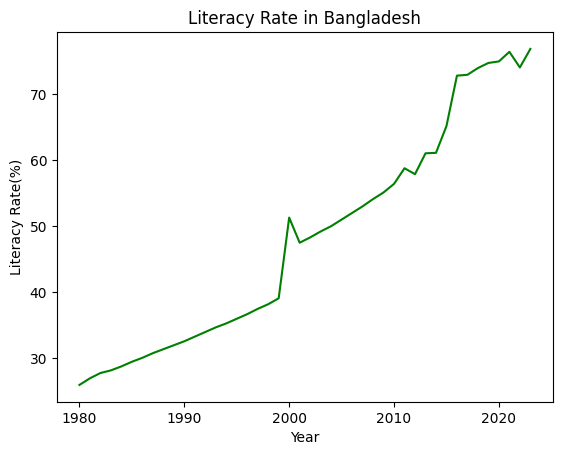

In [8]:
sns.lineplot(x='Year', y='Literacy Rate(%)', data=df, color='green')

plt.title('Literacy Rate in Bangladesh')
plt.show()

In [10]:
df['GDP (in billions)'] = df['GDP'].str.translate(str.maketrans('', '', '$B')).astype(float)
df['GDP']

0      $18.14B
1      $20.25B
2      $18.53B
3      $17.61B
4      $18.92B
5      $22.28B
6      $21.77B
7      $24.30B
8      $26.58B
9      $28.78B
10     $31.60B
11     $30.96B
12     $31.71B
13     $33.17B
14     $33.77B
15     $37.94B
16     $46.44B
17     $48.24B
18     $49.98B
19     $51.27B
20     $53.37B
21     $53.99B
22     $54.72B
23     $60.16B
24     $65.11B
25     $69.48B
26     $71.80B
27     $79.61B
28     $91.64B
29    $102.48B
30    $115.28B
31    $128.61B
32    $133.31B
33    $150.00B
34    $172.89B
35    $195.15B
36    $265.22B
37    $293.73B
38    $321.36B
39    $351.23B
40    $373.98B
41    $416.27B
42    $460.13B
43    $437.42B
Name: GDP, dtype: object

In [24]:
df['Education Spending (% of GDP)'] = convert_to_float('Education Spending (% of GDP)')

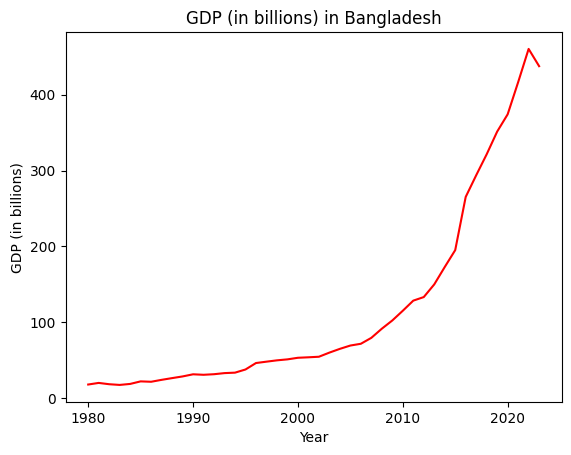

In [12]:
sns.lineplot(x='Year', y='GDP (in billions)', data=df, color='red')

plt.title('GDP (in billions) in Bangladesh')
plt.show()

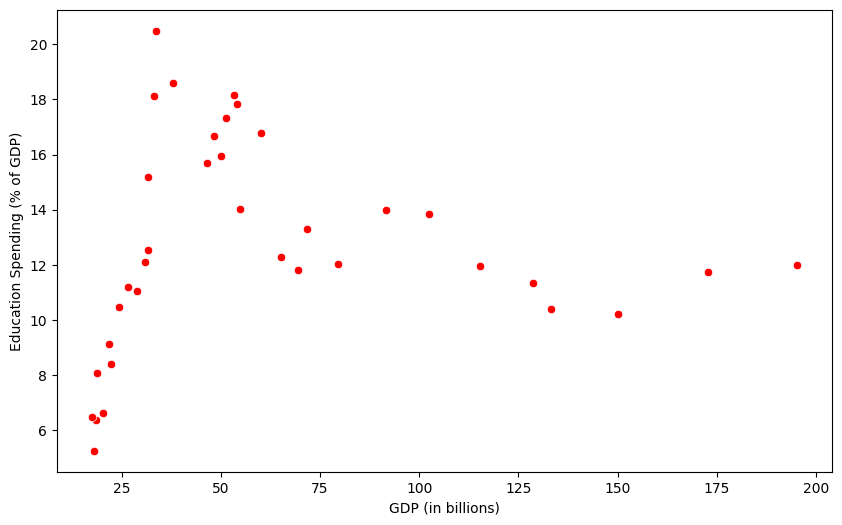

In [27]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='GDP (in billions)', y=df['Education Spending (% of GDP)'], data=df, color='red')
#plt.gca().invert_yaxis()
plt.show()